# Data preparation

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
df = pd.read_csv('Rice_Cammeo_Osmancik.csv', sep=';', decimal=',')
df.columns = df.columns.str.lower().str.replace(' ', '_')
df.head()

,area,perimeter,major_axis_length,minor_axis_length,eccentricity,convex_area,extent,class
0,15231,525.578979,229.749878,85.093788,0.928882,15617,0.572896,Cammeo
1,14656,494.311005,206.020065,91.730972,0.895405,15072,0.615436,Cammeo
2,14634,501.122009,214.106781,87.768288,0.912118,14954,0.693259,Cammeo
3,13176,458.342987,193.337387,87.448395,0.891861,13368,0.640669,Cammeo
4,14688,507.166992,211.743378,89.312454,0.906691,15262,0.646024,Cammeo


# EDA

Meaning of the columns [1]:
- Area: Number of pixels within the boundaries of the rice grain.
- Perimeter: Calculates the circumference by calculating the distance between pixels around the boundaries of the rice grain.
- Major Axis Length: The longest line that can be drawn on the rice grain.
- Minor Axis Length: The shortest line that can be drawn on the rice  grain.
- Eccentricity: It measures how round the ellipse is
- Convex Area: Number of pixels count of the smallest convex shell of the region formed by the rice grain.
- Extent: Ratio of the region formed by the rice grain to the bounding box pixels.
- Class (target): Rice Variety (Cammeo or Osmancik).

### Basic information

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3810 entries, 0 to 3809
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   area               3810 non-null   int64  
 1   perimeter          3810 non-null   float64
 2   major_axis_length  3810 non-null   float64
 3   minor_axis_length  3810 non-null   float64
 4   eccentricity       3810 non-null   float64
 5   convex_area        3810 non-null   int64  
 6   extent             3810 non-null   float64
 7   class              3810 non-null   object 
dtypes: float64(5), int64(2), object(1)
memory usage: 238.2+ KB


### Number of classes

In [60]:
df['class'].unique()

array(['Cammeo', 'Osmancik'], dtype=object)

### Some statistics

In [61]:
df.describe()


,area,perimeter,major_axis_length,minor_axis_length,eccentricity,convex_area,extent
count,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000,3810.000000
mean,12667.727559,454.239180,188.776222,86.313750,0.886871,12952.496850,0.661934
std,1732.367706,35.597081,17.448679,5.729817,0.020818,1776.972042,0.077239
min,7551.000000,359.100006,145.264465,59.532406,0.777233,7723.000000,0.497413
25%,11370.500000,426.144752,174.353855,82.731695,0.872402,11626.250000,0.598862
50%,12421.500000,448.852493,185.810059,86.434647,0.889050,12706.500000,0.645361
75%,13950.000000,483.683746,203.550438,90.143677,0.902588,14284.000000,0.726562
max,18913.000000,548.445984,239.010498,107.542450,0.948007,19099.000000,0.861050


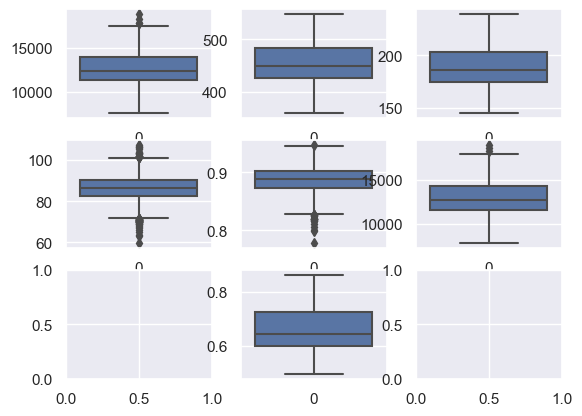

In [62]:
sns.set()
fig, axes = plt.subplots(3, 3)
numeric = ['area', 'perimeter', 'major_axis_length', 'minor_axis_length', 'eccentricity', 'convex_area', 'extent']
ax = [axes[0,0], axes[0,1], axes[0,2], axes[1,0], axes[1,1], axes[1,2], axes[2,1]]
for c, a in zip(numeric, ax):
    sns.boxplot(data=df[c], ax=a)

### Correlation

<AxesSubplot: >

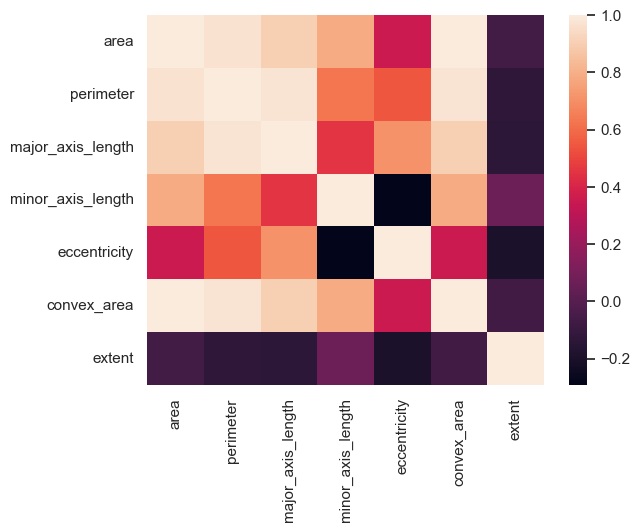

In [63]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr)

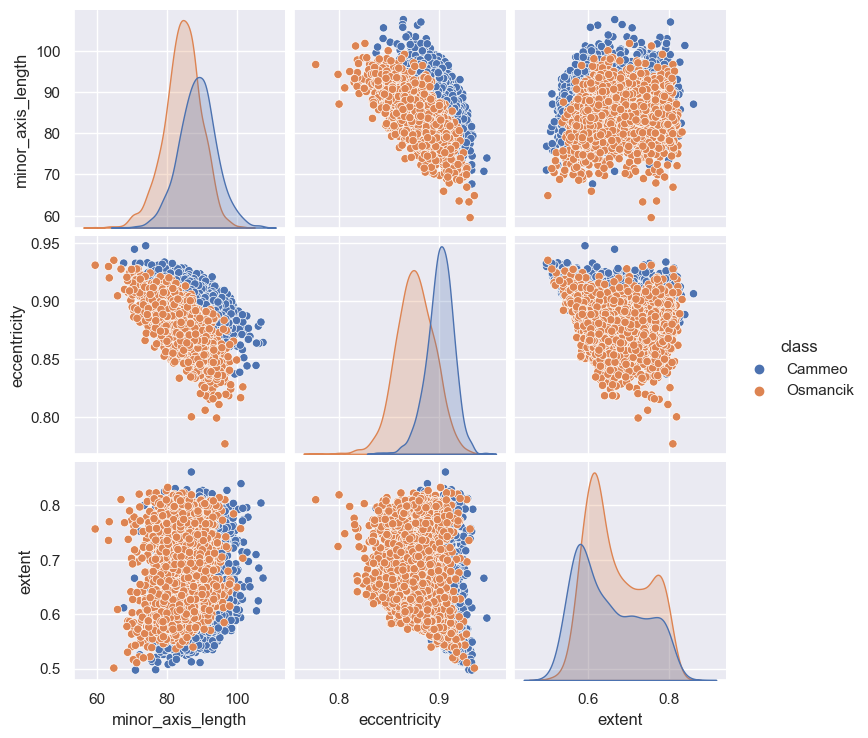

In [64]:
sns.pairplot(data = df, vars=['minor_axis_length','eccentricity','extent'], hue='class')

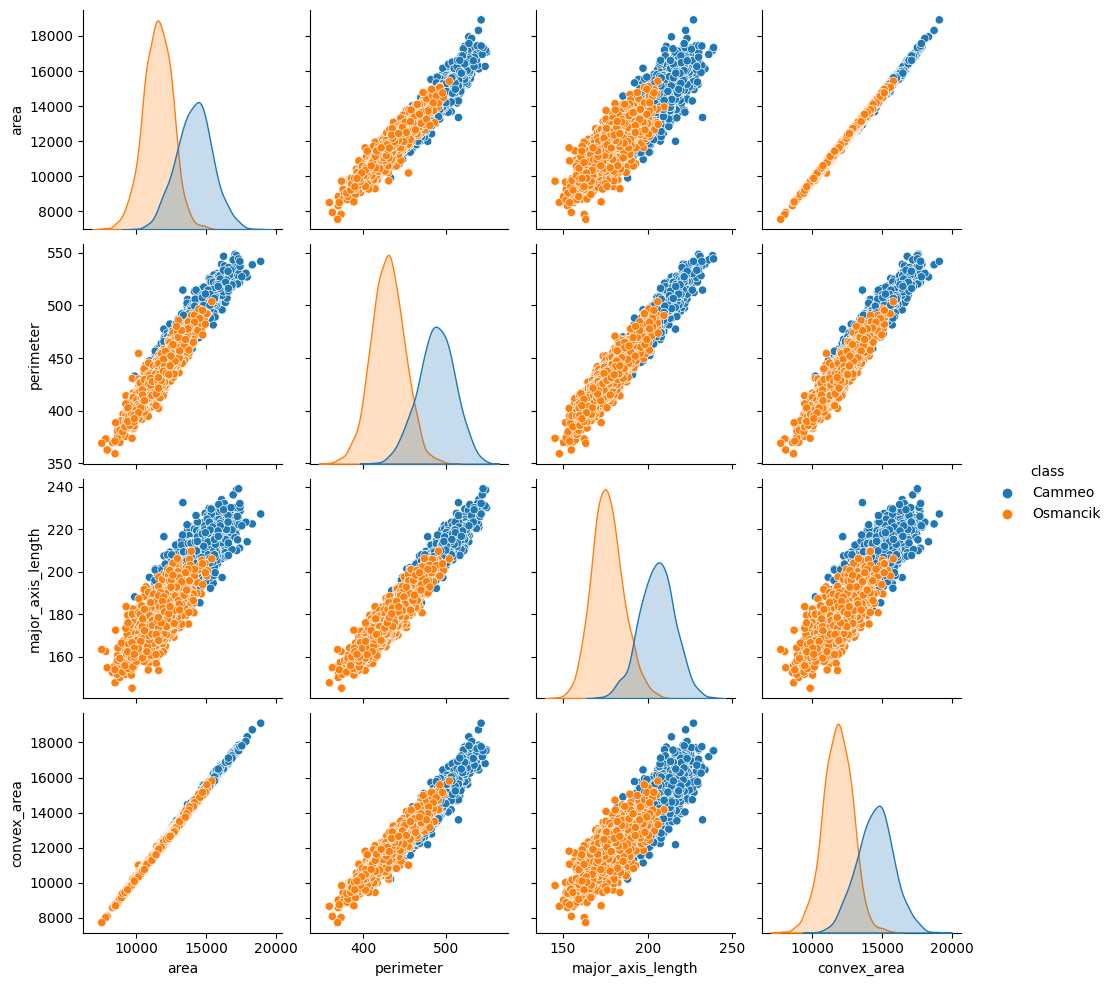

In [45]:
sns.pairplot(data = df, vars=['area','perimeter','major_axis_length','convex_area'], hue='class')